## **UJIAN TENGAH SEMESTER**
### **Fauzan Azhima (105222003)**
### **Studi Kasus 3**
### **Mata Kuliah Machine Learning**

In [2]:
import pandas as pd

# Load the DigitalExposome dataset
file_path = "DigitalExposome Dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows and the summary of the dataset
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


(   IBI        HR  NO2     Noise       NH3      PM10        CO      PM25  \
 0  0.0  0.377574  0.0  0.511358  0.003018  0.003091  0.871758  0.000000   
 1  0.0  0.196398  0.0  0.490903  0.003018  0.003091  0.876848  0.003091   
 2  0.0  0.454163  0.0  0.470449  0.006036  0.006181  0.881939  0.006181   
 3  0.0  0.322451  0.0  0.449995  0.009055  0.009272  0.887030  0.009272   
 4  0.0  0.237595  0.0  0.429540  0.012073  0.012362  0.892121  0.012362   
 
    Label       PM1  EDA  BVP  
 0      5  0.000000  0.0  0.0  
 1      5  0.001854  0.0  0.0  
 2      5  0.003709  0.0  0.0  
 3      5  0.005563  0.0  0.0  
 4      5  0.007417  0.0  0.0  ,
 None,
                 IBI            HR           NO2         Noise           NH3  \
 count  42436.000000  42436.000000  42436.000000  42436.000000  42436.000000   
 mean       0.178688      0.530687      0.502239      0.427541      0.564276   
 std        0.230127      0.266531      0.274914      0.247601      0.294515   
 min        0.000000  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9320\1134112404.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='coolwarm')


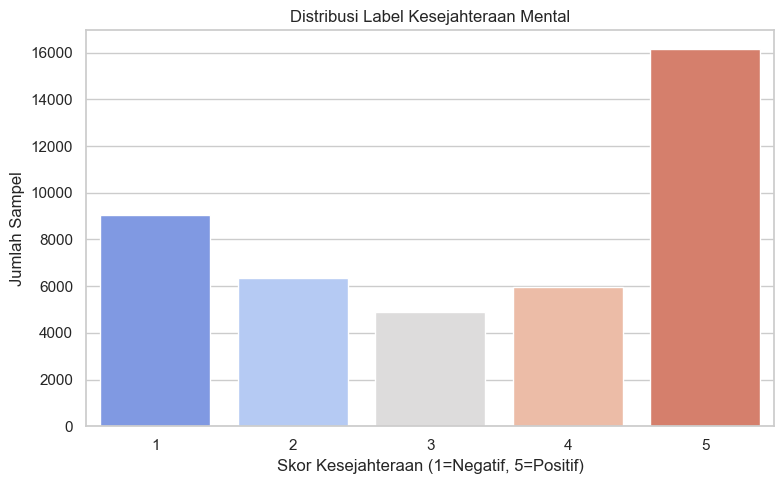

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distribution of the label
plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=df, palette='coolwarm')
plt.title("Distribusi Label Kesejahteraan Mental")
plt.xlabel("Skor Kesejahteraan (1=Negatif, 5=Positif)")
plt.ylabel("Jumlah Sampel")
plt.tight_layout()
plt.show()


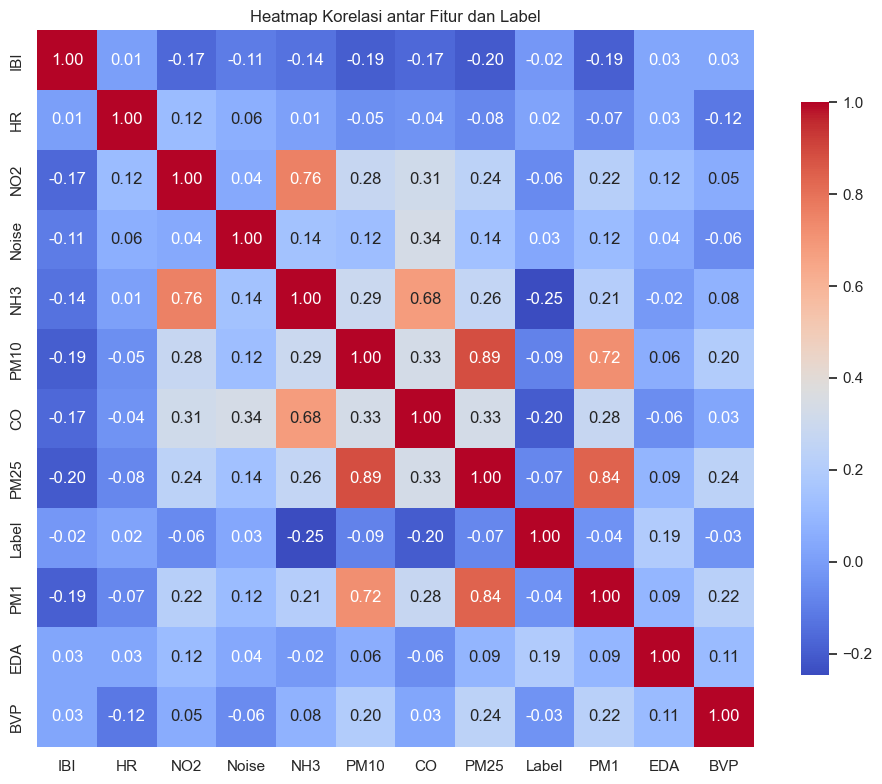

In [9]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Heatmap Korelasi antar Fitur dan Label")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=["Label"])
y = df["Label"]

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Show shapes of the datasets
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


((29705, 11),
 (12731, 11),
 Label
 5    0.380643
 1    0.213230
 2    0.149571
 4    0.140885
 3    0.115671
 Name: proportion, dtype: float64,
 Label
 5    0.380646
 1    0.213180
 2    0.149556
 4    0.140916
 3    0.115702
 Name: proportion, dtype: float64)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5, metric='euclidean')
}

# Train dan evaluasi model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)

results


{'Decision Tree': {'1': {'precision': 0.7293178519593614,
   'recall': 0.7406042741341193,
   'f1-score': 0.7349177330895795,
   'support': 2714.0},
  '2': {'precision': 0.9050576752440106,
   'recall': 0.5357142857142857,
   'f1-score': 0.673045199604091,
   'support': 1904.0},
  '3': {'precision': 0.5907079646017699,
   'recall': 0.5437881873727087,
   'f1-score': 0.5662778366914104,
   'support': 1473.0},
  '4': {'precision': 0.763732129420617,
   'recall': 0.5657748049052397,
   'f1-score': 0.6500160102465578,
   'support': 1794.0},
  '5': {'precision': 0.6930066526042512,
   'recall': 0.8813454395377631,
   'f1-score': 0.7759106185847943,
   'support': 4846.0},
  'accuracy': 0.7161259916738669,
  'macro avg': {'precision': 0.736364454766002,
   'recall': 0.6534453983328233,
   'f1-score': 0.6800334796432865,
   'support': 12731.0},
  'weighted avg': {'precision': 0.7305912319881782,
   'recall': 0.7161259916738669,
   'f1-score': 0.7097921311084749,
   'support': 12731.0}},
 'Rand

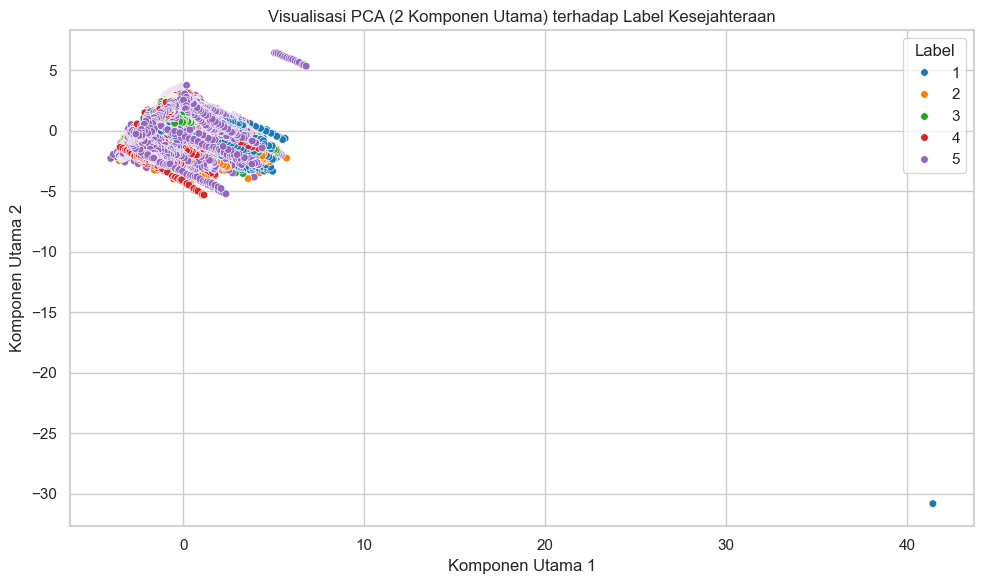

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data sudah dinormalisasi 0-1, tapi PCA biasanya lebih cocok jika data dalam distribusi standar (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA untuk reduksi ke 2D agar bisa divisualisasikan
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Masukkan hasil PCA ke DataFrame untuk visualisasi
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Label"] = y

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Label", palette="tab10", s=30)
plt.title("Visualisasi PCA (2 Komponen Utama) terhadap Label Kesejahteraan")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


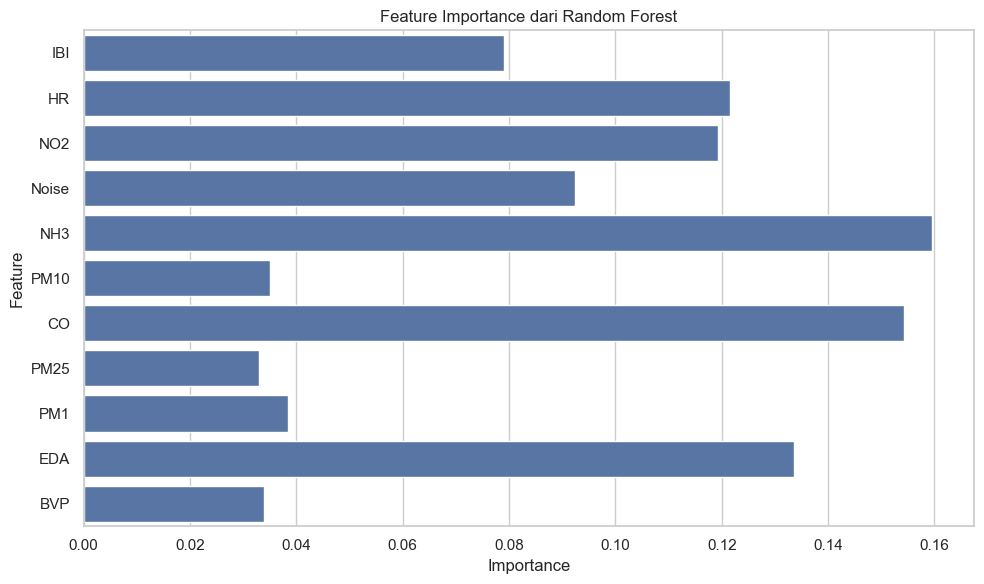

In [12]:
importances = models["Random Forest"].feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance dari Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


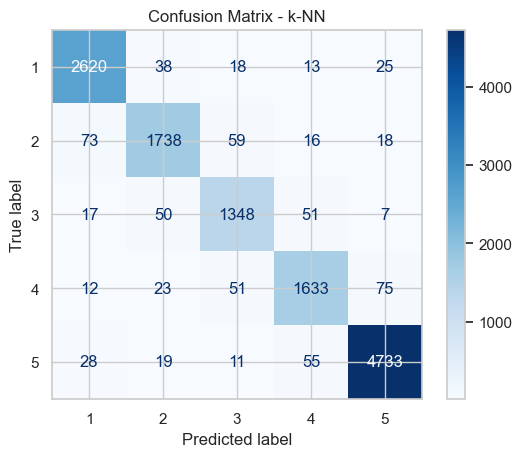

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gunakan model terbaik, misalnya k-NN
y_pred = models["k-NN"].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - k-NN")
plt.show()


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(models["Random Forest"], X, y, cv=5, scoring='accuracy')
print("Akurasi cross-validation (5-fold):", scores)
print("Rata-rata akurasi:", scores.mean())


Akurasi cross-validation (5-fold): [0.53298775 0.71980676 0.57193355 0.49110404 0.9178744 ]
Rata-rata akurasi: 0.6467412987452008
